In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import zipfile
import locale

pd.set_option("display.max_columns", 50)
locale.setlocale( locale.LC_ALL, '' )

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [6]:
# debugging 

# import pdb; pdb.set_trace()
# c means continue
# n means n
# can type in variable names






# LAND VALUE DATA

In [7]:
# checking structure of land value data
zip_path = Path("data/land_value_data/LV_20170701.zip")
zf = zipfile.ZipFile(zip_path)
start_time = time.time()

test_df = pd.read_csv(zf.open("001_LAND_VALUE_DATA_20170701.csv"), dtype=dtype_dict)

elapsed_time = time.time() - start_time
print(elapsed_time)

test_df.sample(100)

0.12241029739379883


DISTRICT CODE DISTRICT NAME  PROPERTY ID PROPERTY TYPE PROPERTY NAME  \
10675              1      CESSNOCK        11595        NORMAL           NaN   
6794               1      CESSNOCK         7622       UNDERSP           NaN   
19164              1      CESSNOCK        20273        NORMAL           NaN   
18913              1      CESSNOCK        19950        NORMAL        NIAREE   
4081               1      CESSNOCK         4667        NORMAL           NaN   
5340               1      CESSNOCK         5027        NORMAL           NaN   
1857               1      CESSNOCK         8798        NORMAL           NaN   
18955              1      CESSNOCK        20010        NORMAL           NaN   
1967               1      CESSNOCK         8915        NORMAL           NaN   
12386              1      CESSNOCK         9420        NORMAL           NaN   
8089               1      CESSNOCK         7984        NORMAL           NaN   
21634              1      CESSNOCK      3184173        NORMAL           NaN   
3329               1      CESSNOCK         2297        NORMAL           NaN   
11977              1      CESSNOCK        12027        NORMAL           NaN   
16291              1      CESSNOCK        15884        NORMAL           NaN   
12130              1      CESSNOCK        14736        NORMAL           NaN   
23503              1      CESSNOCK      3857476        NORMAL           NaN   
12626              1      CESSNOCK        14810        NORMAL           NaN   
4042               1      CESSNOCK         2564        NORMAL           NaN   
820                1      CESSNOCK      3414039        NORMAL           NaN   
13100              1      CESSNOCK        12268        NORMAL           NaN   
13192              1      CESSNOCK        14932        NORMAL           NaN   
6967               1      CESSNOCK         1106        NORMAL           NaN   
8917               1      CESSNOCK         1653        NORMAL           NaN   
14443              1      CESSNOCK        15335        NORMAL           NaN   
21118              1      CESSNOCK      3613865        NORMAL           NaN   
23191              1      CESSNOCK      3325335        NORMAL           NaN   
13197              1      CESSNOCK        14937        NORMAL           NaN   
8009               1      CESSNOCK         5829        NORMAL           NaN   
10038              1      CESSNOCK        16782        NORMAL           NaN   
...              ...           ...          ...           ...           ...   
14333              1      CESSNOCK        12644        NORMAL           NaN   
191                1      CESSNOCK      2962121        NORMAL           NaN   
1067               1      CESSNOCK      3453094        NORMAL       RESERVE   
17694              1      CESSNOCK        10894        NORMAL           NaN   
12219              1      CESSNOCK        17375        NORMAL           NaN   
10020              1      CESSNOCK        16760        NORMAL           NaN   
19835              1      CESSNOCK      3089206        NORMAL           NaN   
17273              1      CESSNOCK        13420        NORMAL           NaN   
9918               1      CESSNOCK        16645        NORMAL           NaN   
11066              1      CESSNOCK         8960        NORMAL           NaN   
5941               1      CESSNOCK         5163        NORMAL           NaN   
9533               1      CESSNOCK        19386        NORMAL           NaN   
3120               1      CESSNOCK            7        NORMAL           NaN   
17610              1      CESSNOCK        18919        NORMAL           NaN   
18080              1      CESSNOCK        18968        NORMAL           NaN   
3048               1      CESSNOCK         6644        NORMAL           NaN   
23038              1      CESSNOCK      3312159        NORMAL           NaN   
13661              1      CESSNOCK        12395        NORMAL           NaN   
6705               1      CESSNOCK         5462        NO

In [8]:
# aggregating land value csv files

def read_csv_and_add_column(csv):
    df = pd.read_csv(zf.open(csv), 
                     encoding="ISO-8859-1", 
                     error_bad_lines=False,
                     dtype=dtype_dict)
    df["SOURCE CSV FILENAME"] = csv
    return df


def get_namelist_csv_only(zf):
    zf_list = zf.namelist()
    csv_list = [k for k in zf_list if ".csv" in k]
    return csv_list


zip_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))
land_value_csv_list = sorted(Path("data/land_value_data").glob("**/*.csv"))
land_value_csv_list_stems =  [k.stem for k in land_value_csv_list]

# loop through all zips, if zip isn't processed then process it
for zip_path in zip_path_list:
    if (zip_path.stem + "_combined") not in land_value_csv_list_stems:
        start_time = time.time()

        zf = zipfile.ZipFile(zip_path)

        zf_df = pd.concat([read_csv_and_add_column(csv) for csv in get_namelist_csv_only(zf)], sort=False)
        zf.close()

        zf_df["SOURCE ZIP FILENAME"] = csv

        zf_df.to_csv(Path("data/land_value_data/{}_combined.csv".format(zip_path.stem)), compression="zip")

        elapsed_time = time.time() - start_time
        print(zip_path.stem + " - " + str(elapsed_time))
    else:
        print("{} has already been processed".format(zip_path.stem))

LV_20170701 has already been processed
LV_20170801 has already been processed
LV_20170901 has already been processed
LV_20171001 has already been processed
LV_20171101 has already been processed
LV_20171201 has already been processed
LV_20180101 has already been processed
LV_20180201 has already been processed
LV_20180301 has already been processed
LV_20180401 has already been processed
LV_20180501 has already been processed
LV_20180601 has already been processed
LV_20180701 has already been processed
LV_20180801 has already been processed
LV_20180901 has already been processed
LV_20181001 has already been processed
LV_20181101 has already been processed
LV_20181201 has already been processed
LV_20190101 has already been processed
LV_20190201 has already been processed
LV_20190301 has already been processed
LV_20190401 has already been processed
LV_20190501 has already been processed
LV_20190601 has already been processed
LV_20190701 has already been processed


In [9]:
# yearly slices
land_value_df_2017 = pd.read_csv(land_value_csv_list[0], compression="zip", dtype=dtype_dict)
land_value_df_2018 = pd.read_csv(land_value_csv_list[12], compression="zip", dtype=dtype_dict)
land_value_df_2019 = pd.read_csv(land_value_csv_list[24], compression="zip", dtype=dtype_dict)




## MARSDEN PARK ANALYSIS 

In [10]:
def get_min_max_of_land_value_df(df):
    min_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].min(), grouping=True)
    max_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].max(), grouping=True)
    return [min_land_value, max_land_value]

#  print([get_min_max_of_land_value_df(land_value_df_2017),
#         get_min_max_of_land_value_df(land_value_df_2018),
#         get_min_max_of_land_value_df(land_value_df_2019)])

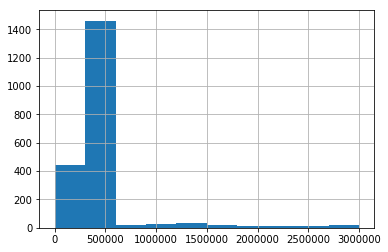

In [11]:
# land value histogram
land_value_df_2017["LAND VALUE 1"][(land_value_df_2017["SUBURB NAME"] == "MARSDEN PARK")].hist(range=(0, 3000000))




## NSW ANALYSIS


In [12]:
suburbs_list_2017 = land_value_df_2017["SUBURB NAME"].unique()
suburbs_list_2018 = land_value_df_2018["SUBURB NAME"].unique()
suburbs_list_2019 = land_value_df_2019["SUBURB NAME"].unique()

# founding of new suburbs

# 2017-2018
print("2017-2018",np.setdiff1d(suburbs_list_2018,suburbs_list_2017))

# 2018-2019
print("2018-2019",np.setdiff1d(suburbs_list_2019,suburbs_list_2018))


2017-2018 ['DIAMOND HEAD' 'FERNANCES CROSSING' 'MOUNT TENANDRA' 'MURRAYS RUN'
 'PERISHER VALLEY']
2018-2019 ['BONDI FOREST' 'MAGOMETON' 'NORTH KELLYVILLE' 'NORWEST']


In [44]:
# create null/not null versions of 2017 and 2019 dataframes
suburbs_list_2017_null = land_value_df_2017[:][land_value_df_2017["PROPERTY NAME"].isnull()]
suburbs_list_2017_not_null = land_value_df_2017[:][~land_value_df_2017["PROPERTY NAME"].isnull()]
suburbs_list_2019_null = land_value_df_2019[:][land_value_df_2019["PROPERTY NAME"].isnull()]
suburbs_list_2019_not_null = land_value_df_2019[:][~land_value_df_2019["PROPERTY NAME"].isnull()]

pandas.core.frame.DataFrame

In [87]:
# land value sum of suburbs
suburb_land_value_sum_2017 = suburbs_list_2017_null.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("a")
suburb_land_value_sum_2019 = suburbs_list_2019_null.groupby("SUBURB NAME")["LAND VALUE 1"].sum().rename("b")
suburb_land_value_sum_df = pd.concat([suburb_land_value_sum_2017,
                                      suburb_land_value_sum_2019], axis=1, sort=False).reset_index()

suburb_land_value_sum_df["DIFFERENCE ($)"] = suburb_land_value_sum_df.apply(lambda row: row.b - row.a , axis=1)
suburb_land_value_sum_df.rename(columns={"index": "SUBURB NAME", 
                                         "a": "2017 LAND VALUE ($)", 
                                         "b": "2019 LAND VALUE ($)"}).sort_values(by="DIFFERENCE ($)", ascending=False)

SUBURB NAME  2017 LAND VALUE ($)  2019 LAND VALUE ($)  \
2666              MOSMAN         1.487654e+10         1.900893e+10   
3610              SYDNEY         7.745653e+09         1.128333e+10   
2439        MARSDEN PARK         1.767013e+09         4.188689e+09   
3573         STRATHFIELD         9.285835e+09         1.166346e+10   
2438        MARRICKVILLE         8.222658e+09         1.013206e+10   
823          CASTLE HILL         1.018265e+10         1.199325e+10   
2246          LEPPINGTON         1.708916e+09         3.407987e+09   
524             BOX HILL         1.937968e+09         3.564921e+09   
2452              MASCOT         4.406044e+09         5.977372e+09   
2408               MANLY         6.413372e+09         7.970970e+09   
2435            MAROUBRA         8.804006e+09         1.028566e+10   
2371      MACQUARIE PARK         2.550959e+09         3.996683e+09   
3066          PARRAMATTA         3.710042e+09         5.147647e+09   
868            CHATSWOOD         7.403906e+09         8.816469e+09   
2257            LIDCOMBE         4.240891e+09         5.630724e+09   
1903        HUNTERS HILL         5.161513e+09         6.543119e+09   
3360                RYDE         6.014459e+09         7.389095e+09   
3222            RANDWICK         8.050124e+09         9.345454e+09   
387            BLACKTOWN         6.011599e+09         7.293817e+09   
3277          RIVERSTONE         2.087335e+09         3.342291e+09   
102               AUBURN         5.142228e+09         6.343660e+09   
3407          SCHOFIELDS         2.530243e+09         3.699058e+09   
2238          LEICHHARDT         4.764473e+09         5.901268e+09   
153              BALMAIN         3.905864e+09         5.012486e+09   
105              AUSTRAL         1.668757e+09         2.773545e+09   
94              ASHFIELD         5.398143e+09         6.486153e+09   
3596         SURRY HILLS         4.832183e+09         5.903703e+09   
711            BYRON BAY         2.916603e+09         3.986304e+09   
976              CONCORD         5.540357e+09         6.597135e+09   
28            ALEXANDRIA         4.828243e+09         5.868375e+09   
...                  ...                  ...                  ...   
2134           KOORAGANG         2.642633e+08         2.571480e+08   
3980              WAKOOL         3.678038e+07         2.931583e+07   
3323            ROSSGOLE         1.235170e+07         4.610000e+06   
3422            SEGENHOE         3.229450e+07         2.447989e+07   
863      CHARLOTTES PASS         9.392200e+06         3.890000e+05   
2184     LAKE CARGELLIGO         7.469049e+07         6.393829e+07   
1878        HOMEBUSH BAY         3.866100e+07         2.547150e+07   
889             CHULLORA         5.705218e+08         5.485248e+08   
824          CASTLE ROCK         3.736343e+07         1.436340e+07   
1743        GULARGAMBONE         9.326164e+07         6.774523e+07   
575          BROKEN HILL         2.467664e+08         2.160203e+08   
178           BARANGAROO         1.261248e+08         7.695568e+07   
979           CONDOBOLIN         2.580957e+08         1.529947e+08   
1020           COONAMBLE         3.603956e+08         2.496562e+08   
2034          KELLYVILLE         8.225720e+09         6.705267e+09   
1688              GRAGIN         2.600000e+05                  NaN   
3071       PATONGA CREEK         1.500000e+04                  NaN   
3744     THREDBO VILLAGE         6.859520e+06                  NaN   
4199          WILPINJONG         1.452000e+06                  NaN   
4401        BONDI FOREST                  NaN         6.040000e+04   
4402      CAMERONS CREEK                  NaN         1.100000e+05   
4403             CURRAGH                  NaN         4.900000e+03   
4404        DIAMOND HEAD                  NaN         5.170000e+05   
4405  FERNANCES CROSSING                  NaN         5.583000e+06   
4406              KULWIN                  NaN         9.620000e+04   
4407      MOUNT TENANDR

### NULL/NOT NULL PROPERTY NAME ANALYSIS

In [14]:
# investigating property name column

# sorted(land_value_df_2019["PROPERTY NAME"][~land_value_df_2019["PROPERTY NAME"].isnull()].unique())

# max_null = land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()].max()
# land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"] == max_null]

null_land_value_list = sorted(land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()])
land_value_df_2019[:][land_value_df_2019["LAND VALUE 1"].isin(null_land_value_list)].sort_values(by=["LAND VALUE 1"], ascending=False)

# land_value_df_2019["LAND VALUE 1"][~land_value_df_2019["PROPERTY NAME"].isnull()].hist()

# land_value_df_2019[:][land_value_df_2019["PROPERTY NAME"].isnull() & (land_value_df_2019["LAND VALUE 1"] < 100)].sort_values(by="LAND VALUE 1", ascending=False)

Unnamed: 0  DISTRICT CODE       DISTRICT NAME  PROPERTY ID  \
2599189       27552            708      CITY OF SYDNEY      3819161   
346811         5101             81     THE HILLS SHIRE      4201444   
2594104       22467            708      CITY OF SYDNEY      3169836   
2593732       22095            708      CITY OF SYDNEY      4040113   
526875        25985             90                RYDE      3989413   
2594707       23070            708      CITY OF SYDNEY      3716196   
1186170       56094            214           BLACKTOWN      4106580   
2002562       48160            261          CUMBERLAND      3623946   
1954225       48212            260  CITY OF PARRAMATTA      3956735   
393882        52172             81     THE HILLS SHIRE      3845503   
2573115        1478            708      CITY OF SYDNEY      2038311   
394222        52512             81     THE HILLS SHIRE      3833062   
526907        26017             90                RYDE      3979359   
2594684       23047            708      CITY OF SYDNEY      3697225   
500482         9974             88        NORTH SYDNEY      3638126   
2599182       27545            708      CITY OF SYDNEY      3785510   
526600        25710             90                RYDE      3342845   
2331837        8766            276             BAYSIDE      3750239   
2575084        3447            708      CITY OF SYDNEY      3435979   
2575234        3597            708      CITY OF SYDNEY      4183121   
512144        11254             90                RYDE       894877   
2580933        9296            708      CITY OF SYDNEY      2123696   
2593905       22268            708      CITY OF SYDNEY      4124443   
2331840        8769            276             BAYSIDE      3750243   
1954224       48211            260  CITY OF PARRAMATTA      3956734   
2573395        1758            708      CITY OF SYDNEY      2035943   
2573055        1418            708      CITY OF SYDNEY      2027792   
2572891        1254            708      CITY OF SYDNEY      2038096   
2594396       22759            708      CITY OF SYDNEY      3679936   
2594539       22902            708      CITY OF SYDNEY      3799662   
...             ...            ...                 ...          ...   
114174         1347              5            MAITLAND      3387900   
145346        32519              5            MAITLAND      3981724   
2062222        1828            266            HILLTOPS       410730   
108943        77722              4      LAKE MACQUARIE      3270976   
2332087        9016            276             BAYSIDE      3737770   
190715        36757              8           NEWCASTLE       233809   
190716        36758              8           NEWCASTLE       233812   
1590672       64774            224             PENRITH      3773295   
154736          778              8           NEWCASTLE      3407962   
154350          392              8           NEWCASTLE      2922545   
153865         7540              7        MUSWELLBROOK      3851843   
2332088        9017            276             BAYSIDE      3737771   
157578         3620              8           NEWCASTLE      3582769   
17641         17641              1            CESSNOCK        18716   
2575340        3703            708      CITY OF SYDNEY      4143552   
1059453        1053            188            INVERELL      4097681   
2417669         431            529   GOULBURN MULWAREE      3397910   
185916        31958              8           NEWCASTLE       224085   
490148         6554             87              MOSMAN      3498865   
107759        76538              4      LAKE MACQUARIE      3722805   
171289        17331              8           NEWCASTLE       217513   
128695        15868              5            MAITLAND       182913   
157579         3621              8           NEWCASTLE      3582772   
2575338        3701            708      CITY OF SYDNEY      4143550   
2575301        3664            70

In [15]:
# quantile range
null_property_name_series = land_value_df_2019["LAND VALUE 1"][land_value_df_2019["PROPERTY NAME"].isnull()]
not_null_property_name_series = land_value_df_2019["LAND VALUE 1"][~land_value_df_2019["PROPERTY NAME"].isnull()]

print(null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))
print(not_null_property_name_series.quantile([0, 0.25, 0.5, 0.75, 1]))

0.00            1.0
0.25       224000.0
0.50       418000.0
0.75       787000.0
1.00    306000000.0
Name: LAND VALUE 1, dtype: float64
0.00            1.0
0.25       131000.0
0.50       382000.0
0.75      1070000.0
1.00    608000000.0
Name: LAND VALUE 1, dtype: float64


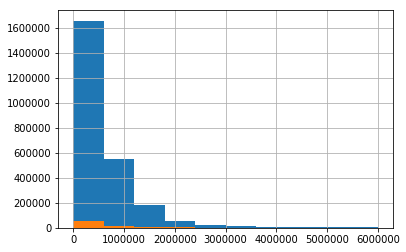

In [16]:
# histograms
null_property_name_series.hist(range=(0, 6000000))
not_null_property_name_series.hist(range=(0, 6000000))






# CRIME DATA

In [77]:
# getting crime data
NSW_crime_data_filepath = Path("data/SuburbData2018.csv")
NSW_crime_df = pd.read_csv(NSW_crime_data_filepath)

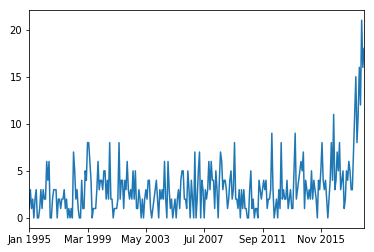

In [83]:
# checking structure of crime data
suburb_crime_df = NSW_crime_df[:][NSW_crime_df["Suburb"] == "Box Hill"]
suburb_crime_timeseries = suburb_crime_df.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
suburb_crime_timeseries.plot()

In [75]:
# types of offences
unique_offence_categories = NSW_crime_df["Offence category"].unique()
# pd.Series(unique_offence_categories)

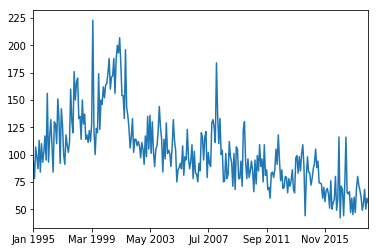

In [84]:
# filter suburb and offence category then plot
marsdenpark_data = NSW_crime_df[:][(NSW_crime_df["Suburb"] == "Mascot") &
                                   (NSW_crime_df["Offence category"] == "Theft")]
total_crime_timeseries = marsdenpark_data.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
total_crime_timeseries.plot()